### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

# some duplicates found using all rows
print("Before removing duplicates:", data.shape)
df = data.drop_duplicates()
print("After removing duplicates:", df.shape)

# some missing data found in critical rows
missing_counts = df.isnull().sum().sort_values()
print(missing_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# dropping unnecessary car column due to excessive NULLs and duplicate rows
df = data.drop_duplicates()
df = df.drop('car', axis=1)

# dropping rows that are missing critical data
df.dropna(subset=['Bar', 'RestaurantLessThan20', 'CarryAway', 'Restaurant20To50', 'CoffeeHouse'], inplace=True)

# resetting index
df.reset_index(inplace=True)

# convert 'time' column to actual type using proper format
# df['time'] = pd.to_datetime(df['time'], format='%H%p')

# change 'age' column to numeric values where below21 : <= 20, 21: 21 to 25, 26: 26 to 30...50plus: >= 51
# df.loc[df.query('age == "below21"').index, 'age_n'] = 20
# df.loc[df.query('age == "50plus"').index, 'age_n'] = 51
# df.loc[df.query('age != "50plus" and age != "below21"').index, 'age_n'] = df['age']

# df['age_n'] = df['age_n'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 12007 non-null  int64 
 1   destination           12007 non-null  object
 2   passanger             12007 non-null  object
 3   weather               12007 non-null  object
 4   temperature           12007 non-null  int64 
 5   time                  12007 non-null  object
 6   coupon                12007 non-null  object
 7   expiration            12007 non-null  object
 8   gender                12007 non-null  object
 9   age                   12007 non-null  object
 10  maritalStatus         12007 non-null  object
 11  has_children          12007 non-null  int64 
 12  education             12007 non-null  object
 13  occupation            12007 non-null  object
 14  income                12007 non-null  object
 15  Bar                   12007 non-null

4. What proportion of the total observations chose to accept the coupon?
Answer: 56.8418% accepted the coupon.

In [ ]:
df['Y'].value_counts(normalize=True)

Y
1    0.568418
0    0.431582
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

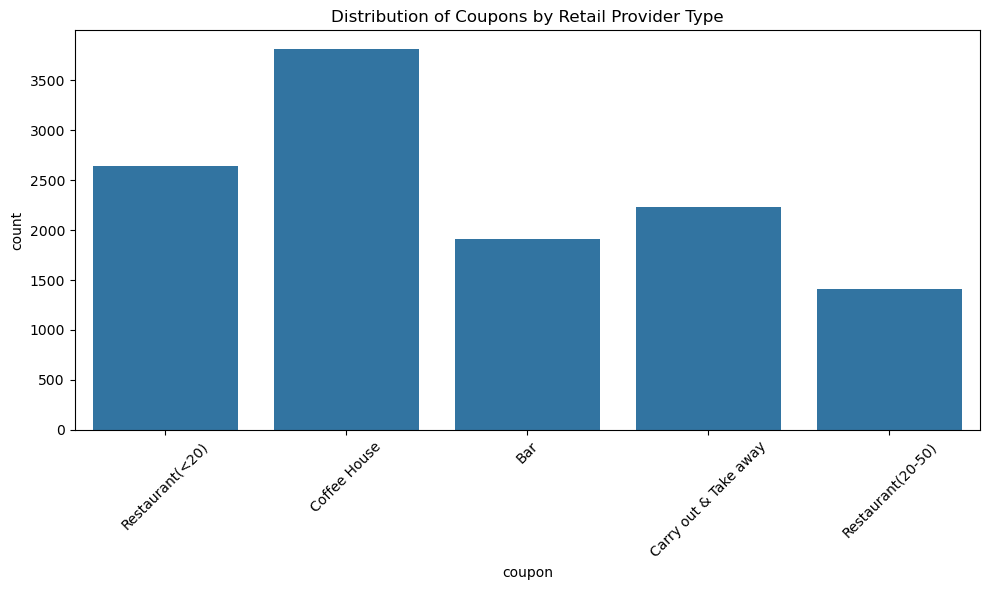

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coupon')
plt.title('Distribution of Coupons by Retail Provider Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Coupons sent vs Temperature')

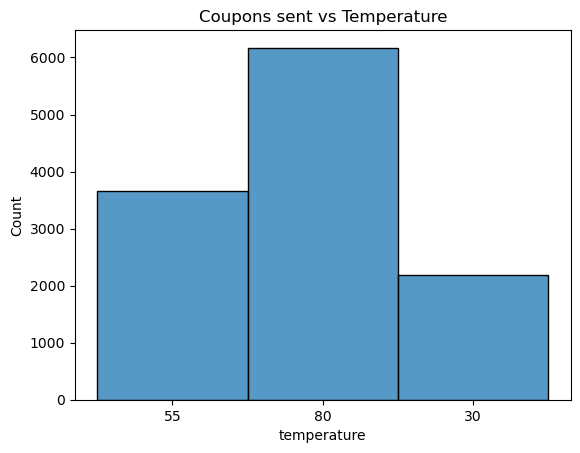

In [8]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
sns.histplot(data=df_str_temp, x='temperature')
plt.title('Coupons sent vs Temperature')


Text(0.5, 1.0, 'Coupons sent vs Temperature during Weather Conditions')

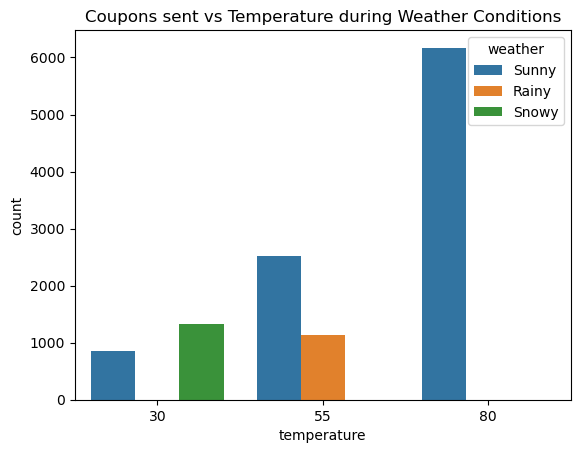

In [9]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
x_order = ['30', '55', '80']
df_str_temp['temperature'] = pd.Categorical(df_str_temp['temperature'], x_order)
sns.countplot(data=df_str_temp, x='temperature', hue='weather')
plt.title("Coupons sent vs Temperature during Weather Conditions")

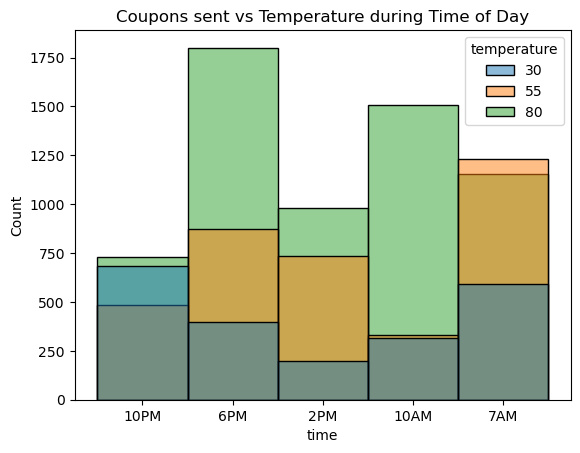

In [10]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
x_order = ['10PM', '6PM', '2PM', '10AM', '7AM']
df_str_temp['time'] = pd.Categorical(df_str_temp['time'], x_order)
sns.histplot(data=df_str_temp, hue='temperature', hue_order=['30', '55', '80'], x='time')
plt.title("Coupons sent vs Temperature during Time of Day")
plt.show()

Text(0.5, 1.0, 'Coupons sent vs Temperature during Travel')

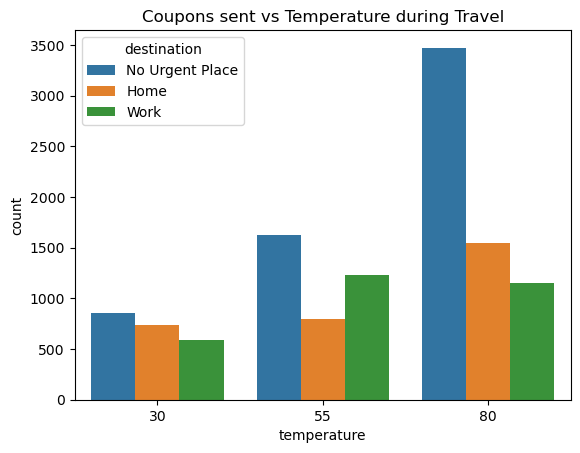

In [11]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
x_order = ['30', '55', '80']
df_str_temp['temperature'] = pd.Categorical(df_str_temp['temperature'], x_order)
sns.countplot(data=df_str_temp, x='temperature', hue='destination')
plt.title("Coupons sent vs Temperature during Travel")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

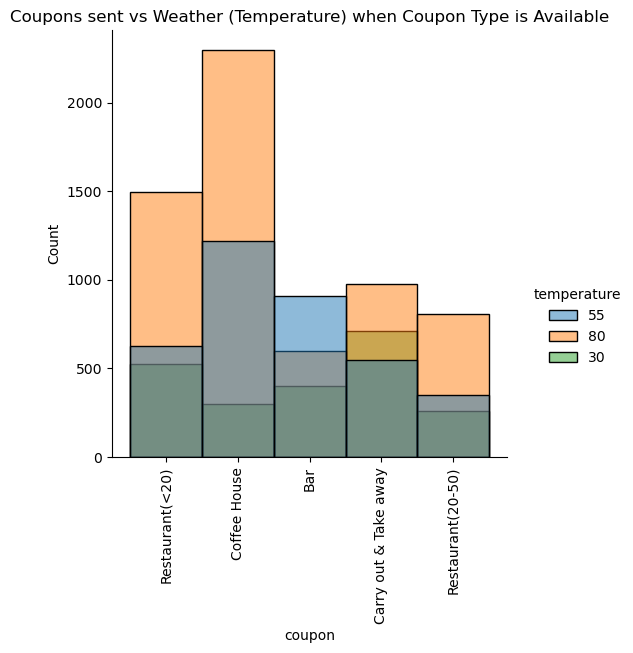

In [12]:
df_str_temp = df
df_str_temp['temperature'] = df['temperature'].astype(str)
sns.displot(data=df_str_temp, hue='temperature', x='coupon')
plt.title("Coupons sent vs Weather (Temperature) when Coupon Type is Available")
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'below21'),
  Text(1, 0, '21'),
  Text(2, 0, '26'),
  Text(3, 0, '31'),
  Text(4, 0, '36'),
  Text(5, 0, '41'),
  Text(6, 0, '46'),
  Text(7, 0, '50plus')])

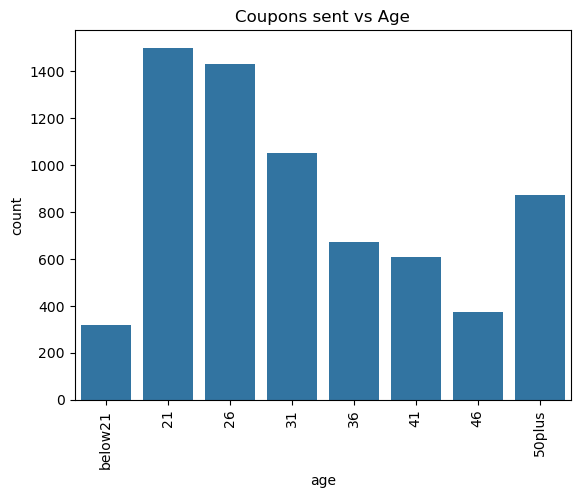

In [13]:
df_sortage = df.loc[df.query('Y == 1').index]
# df_sortage['age'] = df_sortage['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
# x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
x_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
df_sortage['age'] = pd.Categorical(df_sortage['age'], x_order)

sns.countplot(data=df_sortage, x='age')
plt.title("Coupons sent vs Age")
plt.xticks(rotation=90)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bar_coupon_only_df = df.loc[df['coupon'] == 'Bar', ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']]
bar_coupon_only_df.reset_index(inplace=True)

bar_coupon_only_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906 entries, 0 to 1905
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 1906 non-null   int64   
 1   destination           1906 non-null   object  
 2   passanger             1906 non-null   object  
 3   weather               1906 non-null   object  
 4   temperature           1906 non-null   object  
 5   time                  1906 non-null   category
 6   coupon                1906 non-null   object  
 7   expiration            1906 non-null   object  
 8   gender                1906 non-null   object  
 9   age                   1906 non-null   object  
 10  maritalStatus         1906 non-null   object  
 11  has_children          1906 non-null   int64   
 12  education             1906 non-null   object  
 13  occupation            1906 non-null   object  
 14  income                1906 non-null   object  
 15  Bar 

2. What proportion of bar coupons were accepted?
Answer: 41.19% accepted coupon

In [15]:
print('Raw proportion of bar coupons accepted (1) vs rejected (0): ', bar_coupon_only_df['Y'].value_counts(normalize=True))
total_bar_coupons_accepted = bar_coupon_only_df['Y'].value_counts(normalize=False)[1]
print("Total bar coupons accepted: ", total_bar_coupons_accepted)
# bar_coupon_only_df['Y'].value_counts(normalize=False)
# bar_coupon_only_df['maritalStatus'].value_counts(normalize=True)
# bar_coupon_only_df['Bar'].value_counts(normalize=True)
# bar_coupon_only_df['age'].value_counts(normalize=True)


Raw proportion of bar coupons accepted (1) vs rejected (0):  Y
0    0.588143
1    0.411857
Name: proportion, dtype: float64
Total bar coupons accepted:  785


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
query_filter = '(Bar in ["never", "less1", "1~3"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of "bar" coupons accepted by people who go <= 3 time per month:', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%')



Proportion of "bar" coupons accepted by people who go <= 3 time per month: 81.27388535031848 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 638 ]
remainder of everyone else that goes to the bar [ 147 ] -> Proportion:  18.726114649681527 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
query_filter = '(Bar not in ["never", "less1"] and age not in ["below21", "21"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go > 1 time per month and are over 25: ', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%')


Proportion of accepted bar coupons for people that go > 1 time per month and are over 25:  35.4140127388535 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 278 ]
remainder of everyone else that goes to the bar [ 507 ] -> Proportion:  64.5859872611465 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [18]:
query_filter = '(Bar not in ["never", "less1"] and passanger not in ["Alone", "Kid(s)"] and occupation not in ["Farming Fishing & Forestry"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go > 1 time per month with an adult passanger and have an occupation outside of "farming, fishing or forrestry": \n', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%')



Proportion of accepted bar coupons for people that go > 1 time per month with an adult passanger and have an occupation outside of "farming, fishing or forrestry": 
 17.197452229299362 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 135 ]
remainder of everyone else that goes to the bar [ 650 ] -> Proportion:  82.80254777070064 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [19]:
query_filter = '(Bar not in ["never", "less1"] and passanger not in ["Alone", "Kid(s)"] and maritalStatus not in ["Widowed"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go > 1 time per month with an adult passanger and are not widowed": \n', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%\n\n')


query_filter = '(Bar not in ["never", "less1"] and age in ["below21", "21", "26"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go > 1 time per month and are younger than age 30": \n', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%\n\n')


query_filter = '(RestaurantLessThan20 not in ["never", "less1", "1~3"] and income in ["Less than $12500", "$12500 - $24999", "$25000 - $374996", "$37500 - $49999"])'
filter_total = bar_coupon_only_df.query(query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
filter_remainder = bar_coupon_only_df.query("not " + query_filter + " and Y == 1")['Bar'].value_counts(normalize=False).sum()
proportion_from_filter = (filter_total  / total_bar_coupons_accepted)  * 100
proportion_remainder = (filter_remainder / total_bar_coupons_accepted) * 100

print('Proportion of accepted bar coupons for people that go to cheap restaurants > 4 time per month and have an income < $50,000": \n', proportion_from_filter, '%')
print('Out of [', total_bar_coupons_accepted, '] "bar" coupons accepted')
print('Total after filter: [', filter_total, "]")
print('remainder of everyone else that goes to the bar [', filter_remainder, '] -> Proportion: ',  proportion_remainder, '%\n\n')



Proportion of accepted bar coupons for people that go > 1 time per month with an adult passanger and are not widowed": 
 17.197452229299362 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 135 ]
remainder of everyone else that goes to the bar [ 650 ] -> Proportion:  82.80254777070064 %


Proportion of accepted bar coupons for people that go > 1 time per month and are younger than age 30": 
 30.063694267515924 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 236 ]
remainder of everyone else that goes to the bar [ 549 ] -> Proportion:  69.93630573248407 %


Proportion of accepted bar coupons for people that go to cheap restaurants > 4 time per month and have an income < $50,000": 
 15.159235668789808 %
Out of [ 785 ] "bar" coupons accepted
Total after filter: [ 119 ]
remainder of everyone else that goes to the bar [ 666 ] -> Proportion:  84.8407643312102 %




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis:

Only 785 drivers out of 1906 used the bar coupons.  Out of the 785 drivers it appeared that drivers who made over $100,000 and drivers that made < $62,500 used the coupons the most.  It was difficult for me to accept the data regarding occupation in relation to income being that there were students and unemployed drivers shown as making $100,000 which didn't make any sense.  I could have filtered out those data points and used some of the student data but being that most students are potentially under the age of 21 I would think you would want to remove that demographic any way for legal reasons.  With regards to age people >=21 and < 36 did the bulk of the accepting anyway so not being able to use the "Student" demographic was really a non-issue.

It was also noted that drivers that were not parents accepted bar coupons vs drivers that had kids, whether they were with them or not.

Another good target scenario that I observed was when I associated the driver's "destination" and "outside temperature".  It was noted that as temperatures went up and the driver had no real urgency to go anywhere, the bar seemed to be the place of choice.  Similarly it was seen that when the temperature was not too hot and not too cold (55 deg), regardless of urgency, drivers tended to accept the bar coupon more often then not.

After seeing the effect of temperature I decided to compare that with age.  Here it was observed the driver's between the ages of 21 and 30 accepted bar coupons the most over any other relation.  However, this same behavior was exibited during moderate temperatures.

This would suggest a possible correlation between the two where when a temperature of 55 degrees occurs, similar behavior could be expected when dealing with specific age groups when drivers are not parents.  Unfortunately, given the nature of the dataset I was not able to prove any correlation actually existed.

In [24]:
# accepted bar coupons
print('Proportion (%) bar coupons accepted (1) vs rejected (0): ', bar_coupon_only_df['Y'].value_counts(normalize=True))
total_bar_coupons_accepted = bar_coupon_only_df['Y'].value_counts(normalize=False)[1]
print("Total number of bar coupons accepted is", total_bar_coupons_accepted, "out of", bar_coupon_only_df.shape[0])
# bar_coupon_only_df['Y'].value_counts(normalize=False)
# bar_coupon_only_df['maritalStatus'].value_counts(normalize=True)
# bar_coupon_only_df['income'].value_counts(normalize=True)

# by income and occupation
tmp_series = bar_coupon_only_df.loc[bar_coupon_only_df['Y']==1]
print("\nTotal bar coupons accepted when associated with a driver's", tmp_series['income'].value_counts(normalize=False))
print("\nTotal bar coupons accepted when associated with a driver's", tmp_series['occupation'].value_counts(normalize=False))

# by parents and non parents
barcoupon_accepted_wkids_series = bar_coupon_only_df.loc[bar_coupon_only_df.query('has_children == 1 and Y==1').index]
print("\nTotal bar coupons accepted by parents", barcoupon_accepted_wkids_series['age'].value_counts(normalize=False).sum())
barcoupon_accepted_nkids_series = bar_coupon_only_df.loc[bar_coupon_only_df.query('has_children == 0 and Y==1').index]
print(" vs non parents", barcoupon_accepted_nkids_series['age'].value_counts(normalize=False).sum())


Proportion (%) bar coupons accepted (1) vs rejected (0):  Y
0    0.588143
1    0.411857
Name: proportion, dtype: float64
Total number of bar coupons accepted is 785 out of 1906

Total bar coupons accepted when associated with a driver's income
$25000 - $37499     136
$100000 or More     134
$12500 - $24999     114
$50000 - $62499     101
$37500 - $49999      90
Less than $12500     73
$75000 - $87499      54
$62500 - $74999      46
$87500 - $99999      37
Name: count, dtype: int64

Total bar coupons accepted when associated with a driver's occupation
Student                                      114
Unemployed                                    87
Computer & Mathematical                       79
Sales & Related                               78
Management                                    58
Office & Administrative Support               50
Business & Financial                          41
Education&Training&Library                    38
Healthcare Support                            29
Ar

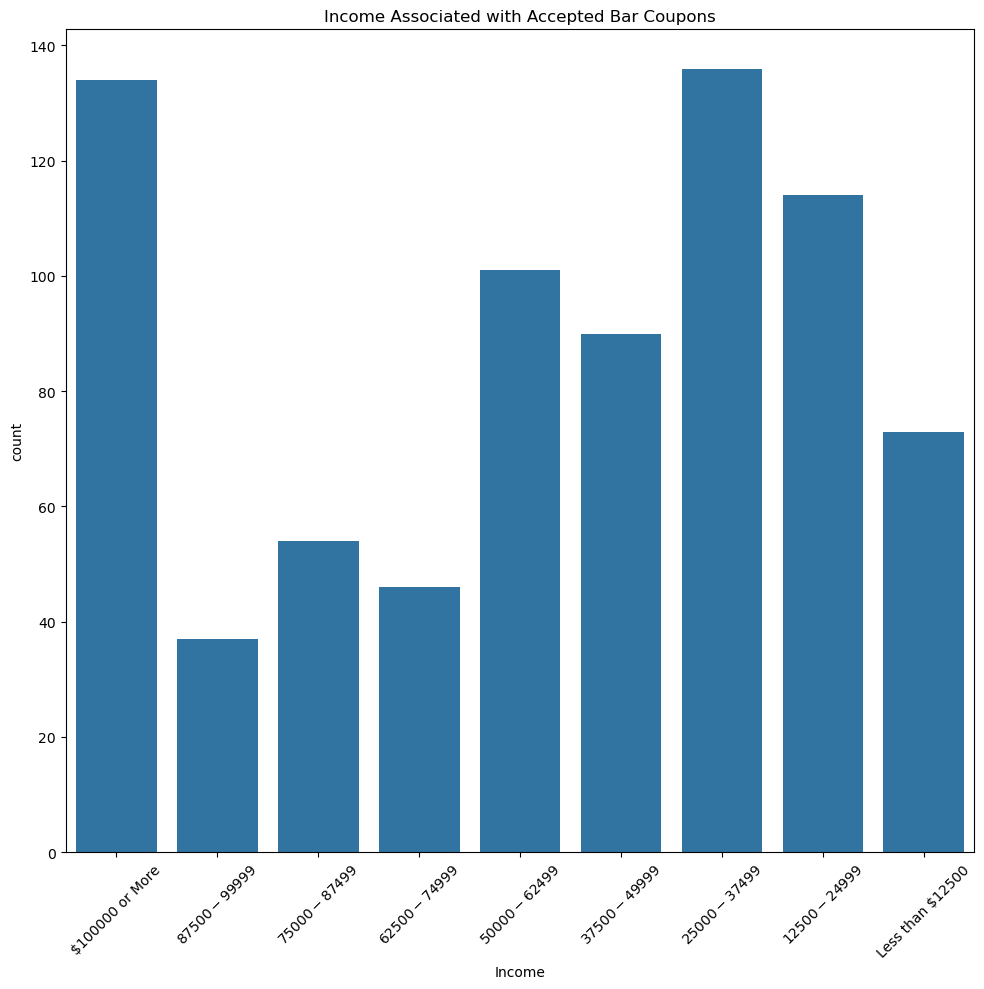

In [88]:
# df_income_order = bar_coupon_only_df.loc[bar_coupon_only_df.query('occupation in ["Unemployed", "Student", "Building & Grounds Cleaning & Maintenance"] and Y==1').index]
df_income_order = bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index]
income_order = ['$100000 or More', '$87500 - $99999', '$75000 - $87499', '$62500 - $74999', '$50000 - $62499', '$37500 - $49999', '$25000 - $37499', '$12500 - $24999', 'Less than $12500']
df_income_order['income'] = pd.Categorical(df_income_order['income'], income_order)

plt.figure(figsize=(10, 10))
sns.countplot(data=df_income_order, x='income')
plt.title("Income Associated with Accepted Bar Coupons")
plt.xlabel('Income')
plt.xticks(rotation=45)

fig_income_accepted_bar_coupons = plt.gcf()
fig_income_accepted_bar_coupons.savefig('images/income_accepted_bar_coupons.png')

plt.tight_layout()
plt.show()


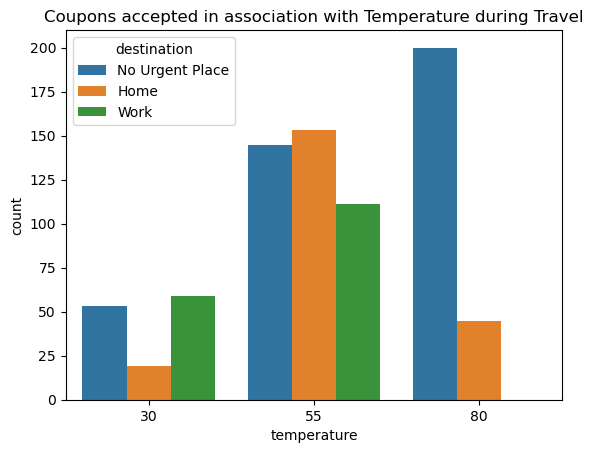

In [89]:
df_dest_temp = bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index]
df_dest_temp['temperature'] = df_dest_temp['temperature'].astype(str)
x_order = ['30', '55', '80']
df_dest_temp['temperature'] = pd.Categorical(df_dest_temp['temperature'], x_order)
sns.countplot(data=df_dest_temp, x='temperature', hue='destination')
plt.title("Coupons accepted in association with Temperature during Travel")

fig_temp_and_travel_waccepted_bar_coupons = plt.gcf()
fig_temp_and_travel_waccepted_bar_coupons.savefig('images/temp_and_travel_waccepted_bar_coupons.png')

plt.show()

Total accepted bar coupons: 785

Total bar coupons accepted when propogating a driver's age
21-25    200
26-30    179
31-35    121
> 50      80
41-45     75
36-40     60
46-50     36
< 21      34
Name: count, dtype: int64
Total accepted bar coupons: 785


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '< 21'),
  Text(1, 0, '21-25'),
  Text(2, 0, '26-30'),
  Text(3, 0, '31-35'),
  Text(4, 0, '36-40'),
  Text(5, 0, '41-45'),
  Text(6, 0, '46-50'),
  Text(7, 0, '> 50')])

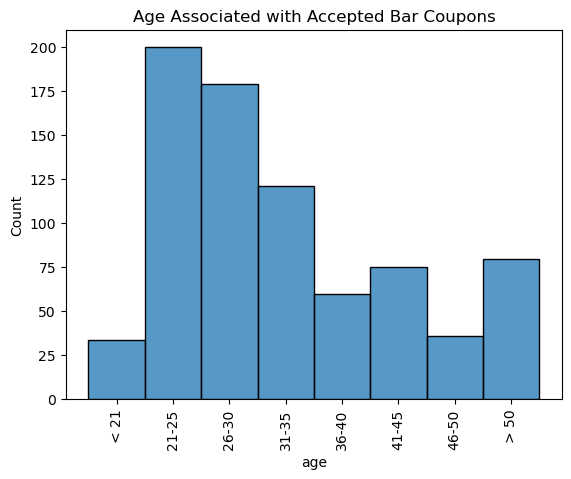

In [73]:
df_sortage = bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index]
df_sortage['age'] = df_sortage['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
# x_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
df_sortage['age'] = pd.Categorical(df_sortage['age'], x_order)
print("Total accepted bar coupons:", df_sortage['age'].value_counts(normalize=False).sum())

# get propogation
print("\nTotal bar coupons accepted when propogating a driver's", df_sortage['age'].value_counts(normalize=False))
print("Total accepted bar coupons:", df_sortage['age'].value_counts(normalize=False).sum())

sns.histplot(data=df_sortage, x='age')
plt.title("Age Associated with Accepted Bar Coupons")
plt.xticks(rotation=90)



Total bar coupons accepted when propogating a driver's age when the temperature is 55 deg age
21-25    109
26-30     86
31-35     63
> 50      46
41-45     42
36-40     32
46-50     17
< 21      14
Name: count, dtype: int64
Total accepted bar coupons: 409


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '< 21'),
  Text(1, 0, '21-25'),
  Text(2, 0, '26-30'),
  Text(3, 0, '31-35'),
  Text(4, 0, '36-40'),
  Text(5, 0, '41-45'),
  Text(6, 0, '46-50'),
  Text(7, 0, '> 50')])

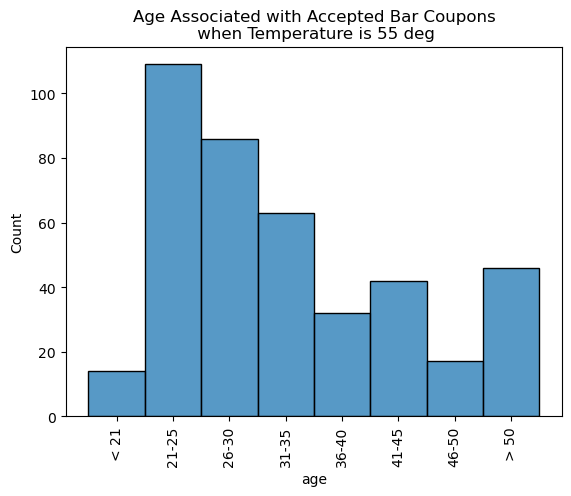

In [43]:
# check best temperature (55) in relation to age
df_temp_55 = bar_coupon_only_df.loc[bar_coupon_only_df.query('temperature == "55" and Y==1').index]
df_temp_55['age'] = df_temp_55['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
# x_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
df_temp_55['age'] = pd.Categorical(df_temp_55['age'], x_order)

# get propogation
print("\nTotal bar coupons accepted when propogating a driver's age when the temperature is 55 deg", df_temp_55['age'].value_counts(normalize=False))
print("Total accepted bar coupons:", df_temp_55['age'].value_counts(normalize=False).sum())

sns.histplot(data=df_temp_55, x='age')
plt.title("Age Associated with Accepted Bar Coupons\n when Temperature is 55 deg")
plt.xticks(rotation=90)



Total bar coupons accepted when comparing all temperatures age
21-25    200
26-30    179
31-35    121
> 50      80
41-45     75
36-40     60
46-50     36
< 21      34
Name: count, dtype: int64
Total accepted bar coupons: 785


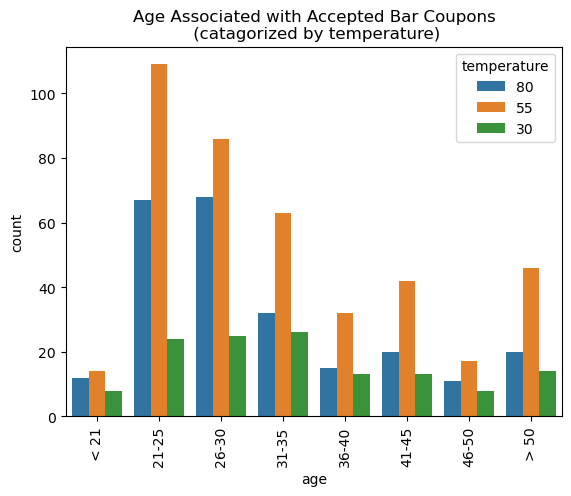

In [93]:
# check accepted coupons with all temperatures in relation to age
df_temp_all = bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index]
df_temp_all['age'] = df_temp_all['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
# x_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
df_temp_all['age'] = pd.Categorical(df_temp_all['age'], x_order)

# get propogation
print("\nTotal bar coupons accepted when comparing all temperatures", df_temp_all['age'].value_counts(normalize=False))
print("Total accepted bar coupons:", df_temp_all['age'].value_counts(normalize=False).sum())

sns.countplot(data=df_temp_all, x='age', hue='temperature')
plt.title("Age Associated with Accepted Bar Coupons\n (catagorized by temperature)")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.savefig('images/bar-coupon-all_ages-by_temp.png', dpi=400, bbox_inches='tight')

plt.show()



Total bar coupons accepted when comparing parental status with age
21-25    200
26-30    179
31-35    121
> 50      80
41-45     75
36-40     60
46-50     36
< 21      34
Name: count, dtype: int64
Total accepted bar coupons: 785


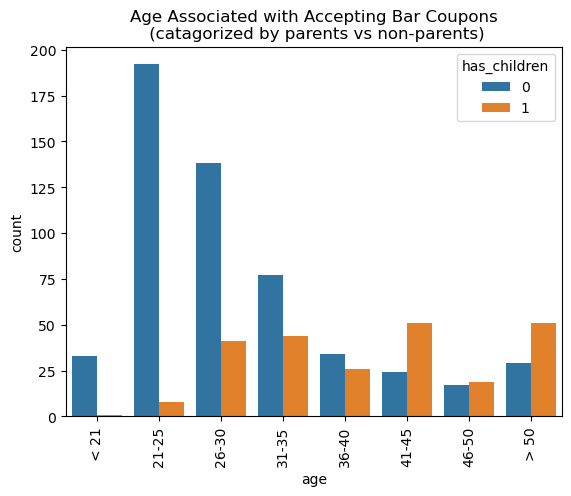

In [92]:
# check accepted coupons with parental status in relation to age
df_temp_all = bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index]
df_temp_all['age'] = df_temp_all['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
df_temp_all['age'] = pd.Categorical(df_temp_all['age'], x_order)

# get propogation
print("\nTotal bar coupons accepted when comparing parental status with", df_temp_all['age'].value_counts(normalize=False))
print("Total accepted bar coupons:", df_temp_all['age'].value_counts(normalize=False).sum())

sns.countplot(data=df_temp_all, x='age', hue='has_children')
plt.title("Age Associated with Accepting Bar Coupons\n (catagorized by parents vs non-parents)")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.savefig('images/bar-coupon-all_ages-parental_status.png', dpi=400, bbox_inches='tight')

plt.show()


In [85]:
# df_age_temp_Y = pd.concat((bar_coupon_only_df.loc[bar_coupon_only_df.query('Y==1').index][['age', 'temperature']], bar_coupon_only_df[['Bar']]), axis = 1)
# df_age_temp_Y['age'] = df_age_temp_Y['age'].map({'below21':20, '21':25, '26':30, '31':35, '36':40, '41':45, '46':50, '50plus':51})
# df_age_temp_Y['temperature'] = df_age_temp_Y['temperature'].map({'30':30, '55':55, '80':80})
# df_age_temp_Y['Bar'] = df_age_temp_Y['Bar'].map({'never':0, 'less1':1, '1~3':3, '4~8':8, 'gt8':10})

# print("missing values", df_age_temp_Y.isnull().sum().sort_values())

# # df_age_temp_Y.head()
# sns.pairplot(df_age_temp_Y, hue='Bar', vars=['age', 'temperature'], palette = "Set2")

# df_age_temp_Y.corr()


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   index                 2646 non-null   int64   
 1   destination           2646 non-null   object  
 2   passanger             2646 non-null   object  
 3   weather               2646 non-null   object  
 4   temperature           2646 non-null   object  
 5   time                  2646 non-null   category
 6   coupon                2646 non-null   object  
 7   expiration            2646 non-null   object  
 8   gender                2646 non-null   object  
 9   age                   2646 non-null   object  
 10  maritalStatus         2646 non-null   object  
 11  has_children          2646 non-null   int64   
 12  education             2646 non-null   object  
 13  occupation            2646 non-null   object  
 14  income                2646 non-null   object  
 15  Bar 

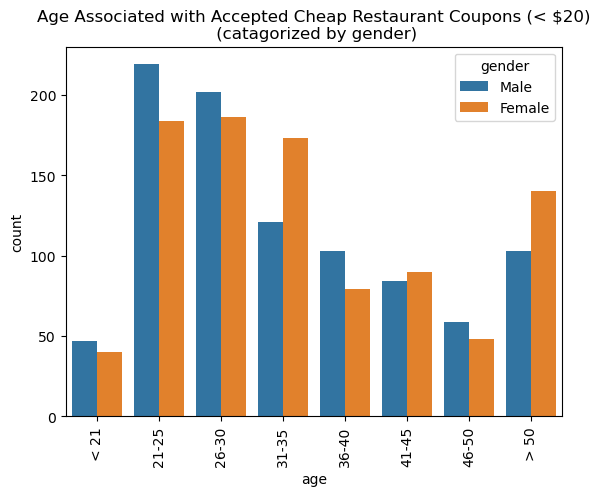

In [72]:
restaurant_less20_df = df.loc[df['coupon'] == 'Restaurant(<20)', ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']]
restaurant_less20_df.reset_index(inplace=True)

restaurant_less20_df.info()

print(restaurant_less20_df['passanger'].value_counts(normalize=False))

# check accepted coupons in specific age groups going to cheap restaurants
df_gender_cheap_restaurant = restaurant_less20_df.loc[restaurant_less20_df.query('Y==1').index]
df_gender_cheap_restaurant['age'] = df_gender_cheap_restaurant['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
df_gender_cheap_restaurant['age'] = pd.Categorical(df_gender_cheap_restaurant['age'], x_order)

# get propogation
print("\nTotal restaurant<20 coupons accepted when propogated by", df_gender_cheap_restaurant['age'].value_counts(normalize=False))
print("Total accepted restaurant<20 coupons:", df_gender_cheap_restaurant['age'].value_counts(normalize=False).sum())

sns.countplot(data=df_gender_cheap_restaurant, x='age', hue='gender')
plt.title("Age Associated with Accepted Cheap Restaurant Coupons (< $20)\n (catagorized by gender)")
plt.xticks(rotation=90)

fig_accepted_rest_less20_coupons_associated_w_age_cat_gender = plt.gcf()
fig_accepted_rest_less20_coupons_associated_w_age_cat_gender.savefig('images/accepted_rest_less20_coupons_associated_w_age_cat_gender.png', dpi=400, bbox_inches='tight')

plt.show()



Total restaurant<20 coupons accepted when propogated by gender
Female    940
Male      938
Name: count, dtype: int64
Total accepted restaurant<20 coupons: 1878

Total restaurant<20 coupons accepted when propogated by has_children
0    0.600639
1    0.399361
Name: proportion, dtype: float64
Total accepted restaurant<20 coupons: 1878


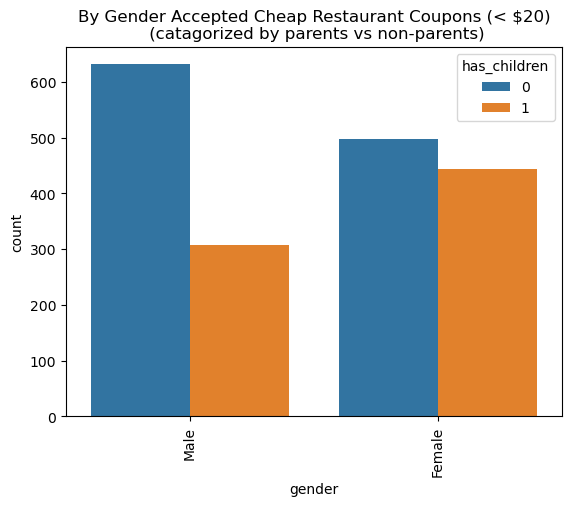

In [74]:
# check accepted coupons in specific gender groups going to cheap restaurants (categorized by parent vs non parent)

# get propogation
print("\nTotal restaurant<20 coupons accepted when propogated by", df_gender_cheap_restaurant['gender'].value_counts(normalize=False))
print("Total accepted restaurant<20 coupons:", df_gender_cheap_restaurant['gender'].value_counts(normalize=False).sum())
print("\nTotal restaurant<20 coupons accepted when propogated by", df_gender_cheap_restaurant['has_children'].value_counts(normalize=True))
print("Total accepted restaurant<20 coupons:", df_gender_cheap_restaurant['has_children'].value_counts(normalize=False).sum())

sns.countplot(data=df_gender_cheap_restaurant, x='gender', hue='has_children')
plt.title("By Gender Accepted Cheap Restaurant Coupons (< $20)\n (catagorized by parents vs non-parents)")
plt.xticks(rotation=90)

fig_accepted_rest_less20_coupons_for_parents_vs_nonparents = plt.gcf()
fig_accepted_rest_less20_coupons_for_parents_vs_nonparents.savefig('images/accepted_rest_less20_coupons_for_parents_vs_nonparents.png', dpi=400, bbox_inches='tight')

plt.show()



Total restaurant<20 coupons accepted by parents when propogated by age
> 50     165
31-35    136
41-45    136
36-40    101
26-30    100
21-25     56
46-50     55
< 21       1
Name: count, dtype: int64
Total accepted restaurant<20 coupons: 750

Total restaurant<20 coupons accepted by non-parents when propogated by age
21-25    347
26-30    288
31-35    158
< 21      86
36-40     81
> 50      78
46-50     52
41-45     38
Name: count, dtype: int64
Total accepted restaurant<20 coupons: 1128


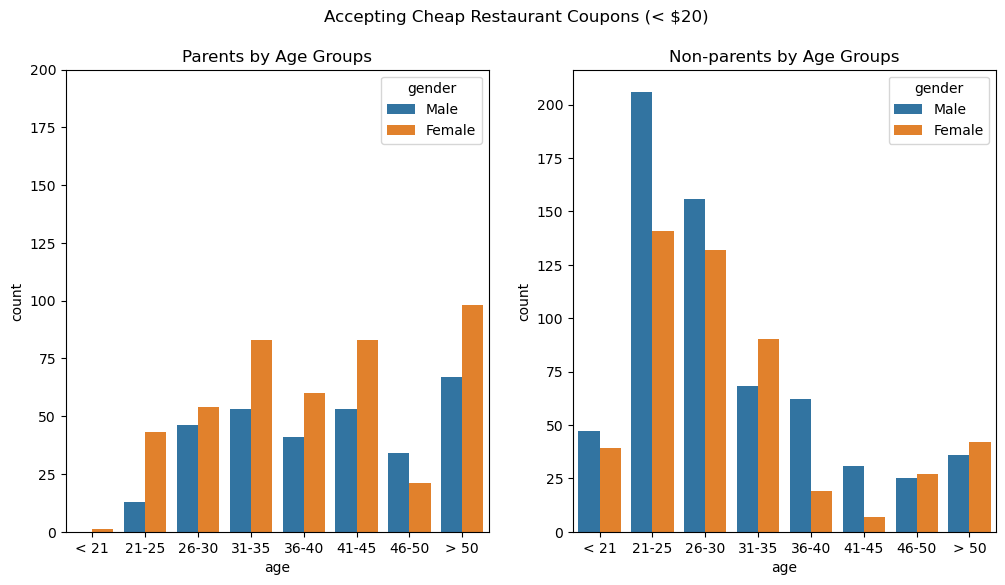

In [75]:
# check accepted coupons by parents and non-parents in specific age groups going to cheap restaurants
df_parent_cheap_restaurant = restaurant_less20_df.loc[restaurant_less20_df.query('has_children==1 and Y==1').index]
df_parent_cheap_restaurant['age'] = df_parent_cheap_restaurant['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
df_parent_cheap_restaurant['age'] = pd.Categorical(df_parent_cheap_restaurant['age'], x_order)

df_non_parent_cheap_restaurant = restaurant_less20_df.loc[restaurant_less20_df.query('has_children==0 and Y==1').index]
df_non_parent_cheap_restaurant['age'] = df_non_parent_cheap_restaurant['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
df_non_parent_cheap_restaurant['age'] = pd.Categorical(df_non_parent_cheap_restaurant['age'], x_order)

# get propogation
print("\nTotal restaurant<20 coupons accepted by parents when propogated by", df_parent_cheap_restaurant['age'].value_counts(normalize=False))
print("Total accepted restaurant<20 coupons:", df_parent_cheap_restaurant['age'].value_counts(normalize=False).sum())

print("\nTotal restaurant<20 coupons accepted by non-parents when propogated by", df_non_parent_cheap_restaurant['age'].value_counts(normalize=False))
print("Total accepted restaurant<20 coupons:", df_non_parent_cheap_restaurant['age'].value_counts(normalize=False).sum())

fig_accepted_rest_less20_coupons_for_parents_and_non_parents_by_age, ax =plt.subplots(1,2, figsize=(12,6))
ax[0].set_title("Parents by Age Groups")
ax[0].set_ylim(0, 200)
# ax[0].set_xticks(df_parent_cheap_restaurant['age'], rotation=90)
ax[1].set_title("Non-parents by Age Groups")

sns.countplot(data=df_parent_cheap_restaurant, x='age', hue='gender', ax=ax[0])
sns.countplot(data=df_non_parent_cheap_restaurant, x='age', hue='gender', ax=ax[1])

fig_accepted_rest_less20_coupons_for_parents_and_non_parents_by_age = plt.gcf()
fig_accepted_rest_less20_coupons_for_parents_and_non_parents_by_age.savefig('images/accepted_rest_less20_coupons_for_parents_and_non_parents_by_age.png', dpi=400, bbox_inches='tight')

fig_accepted_rest_less20_coupons_for_parents_and_non_parents_by_age.suptitle("Accepting Cheap Restaurant Coupons (< $20)")
plt.show()



Total restaurant<20 coupons accepted by non-parents with no passangers when propogated by age
21-25    164
26-30    139
31-35     75
< 21      44
> 50      38
36-40     34
46-50     26
41-45     14
Name: count, dtype: int64
Total accepted restaurant<20 coupons: 534

Total restaurant<20 coupons accepted by non-parents with adult passangers when propogated by age
21-25    181
26-30    149
31-35     83
36-40     47
< 21      42
> 50      40
46-50     26
41-45     23
Name: count, dtype: int64
Total accepted restaurant<20 coupons: 591


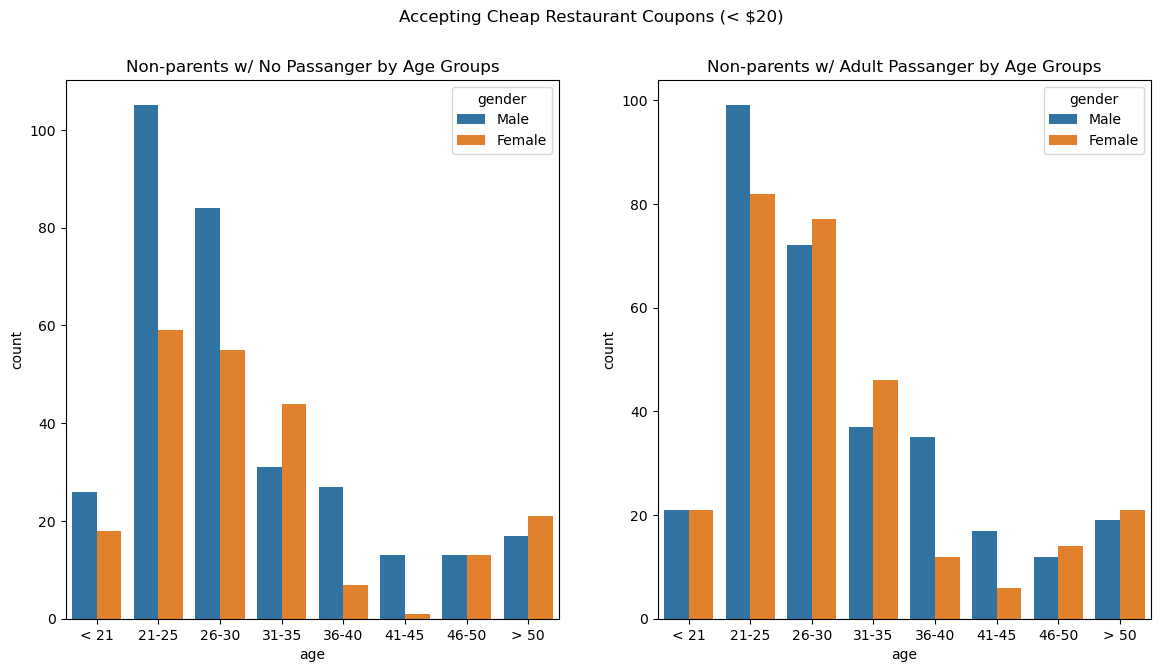

In [69]:
# check accepted coupons by non-parents with passengers that are not kids in specific age groups going to cheap restaurants
df_nonparent_alone_cheap_restaurant = restaurant_less20_df.loc[restaurant_less20_df.query('passanger in ["Alone"] and has_children==0 and Y==1').index]
df_nonparent_alone_cheap_restaurant['age'] = df_nonparent_alone_cheap_restaurant['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
df_nonparent_alone_cheap_restaurant['age'] = pd.Categorical(df_nonparent_alone_cheap_restaurant['age'], x_order)

df_nonparent_pass_cheap_restaurant = restaurant_less20_df.loc[restaurant_less20_df.query('passanger not in ["Alone", "Kid(s)"] and has_children==0 and Y==1').index]
df_nonparent_pass_cheap_restaurant['age'] = df_nonparent_pass_cheap_restaurant['age'].map({'below21':'< 21', '21':'21-25', '26':'26-30', '31':'31-35', '36':'36-40', '41':'41-45', '46':'46-50', '50plus':'> 50'})
x_order = ['< 21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '> 50']
df_nonparent_pass_cheap_restaurant['age'] = pd.Categorical(df_nonparent_pass_cheap_restaurant['age'], x_order)

# get propogation
print("\nTotal restaurant<20 coupons accepted by non-parents with no passangers when propogated by", df_nonparent_alone_cheap_restaurant['age'].value_counts(normalize=False))
print("Total accepted restaurant<20 coupons:", df_nonparent_alone_cheap_restaurant['age'].value_counts(normalize=False).sum())

print("\nTotal restaurant<20 coupons accepted by non-parents with adult passangers when propogated by", df_nonparent_pass_cheap_restaurant['age'].value_counts(normalize=False))
print("Total accepted restaurant<20 coupons:", df_nonparent_pass_cheap_restaurant['age'].value_counts(normalize=False).sum())

fig_accepted_rest_less20_coupons_for_pass_w_non_parents_by_age, ax =plt.subplots(1,2, figsize=(14, 7))
ax[0].set_title("Non-parents w/ No Passanger by Age Groups")
# ax[0].set_ylim(0, 100)
# ax[0].set_xticks(df_parent_cheap_restaurant['age'], rotation=90)
ax[1].set_title("Non-parents w/ Adult Passanger by Age Groups")
# ax[1].set_ylim(0, 100)

sns.countplot(data=df_nonparent_alone_cheap_restaurant, x='age', hue='gender', ax=ax[0])
sns.countplot(data=df_nonparent_pass_cheap_restaurant, x='age', hue='gender', ax=ax[1])

fig_accepted_rest_less20_coupons_for_pass_w_non_parents_by_age = plt.gcf()
fig_accepted_rest_less20_coupons_for_pass_w_non_parents_by_age.savefig('images/accepted_rest_less20_coupons_for_pass_w_non_parents_by_age.png', dpi=400, bbox_inches='tight')

fig_accepted_rest_less20_coupons_for_pass_w_non_parents_by_age.suptitle("Accepting Cheap Restaurant Coupons (< $20)")
plt.show()
